In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [10]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [11]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [13]:
df_train.describe().T #this will give the statistical data 

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

In [16]:
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [17]:
def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [18]:
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
    
print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  19


In [19]:
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [21]:
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(df_train)

In [22]:
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df_train)

In [23]:
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

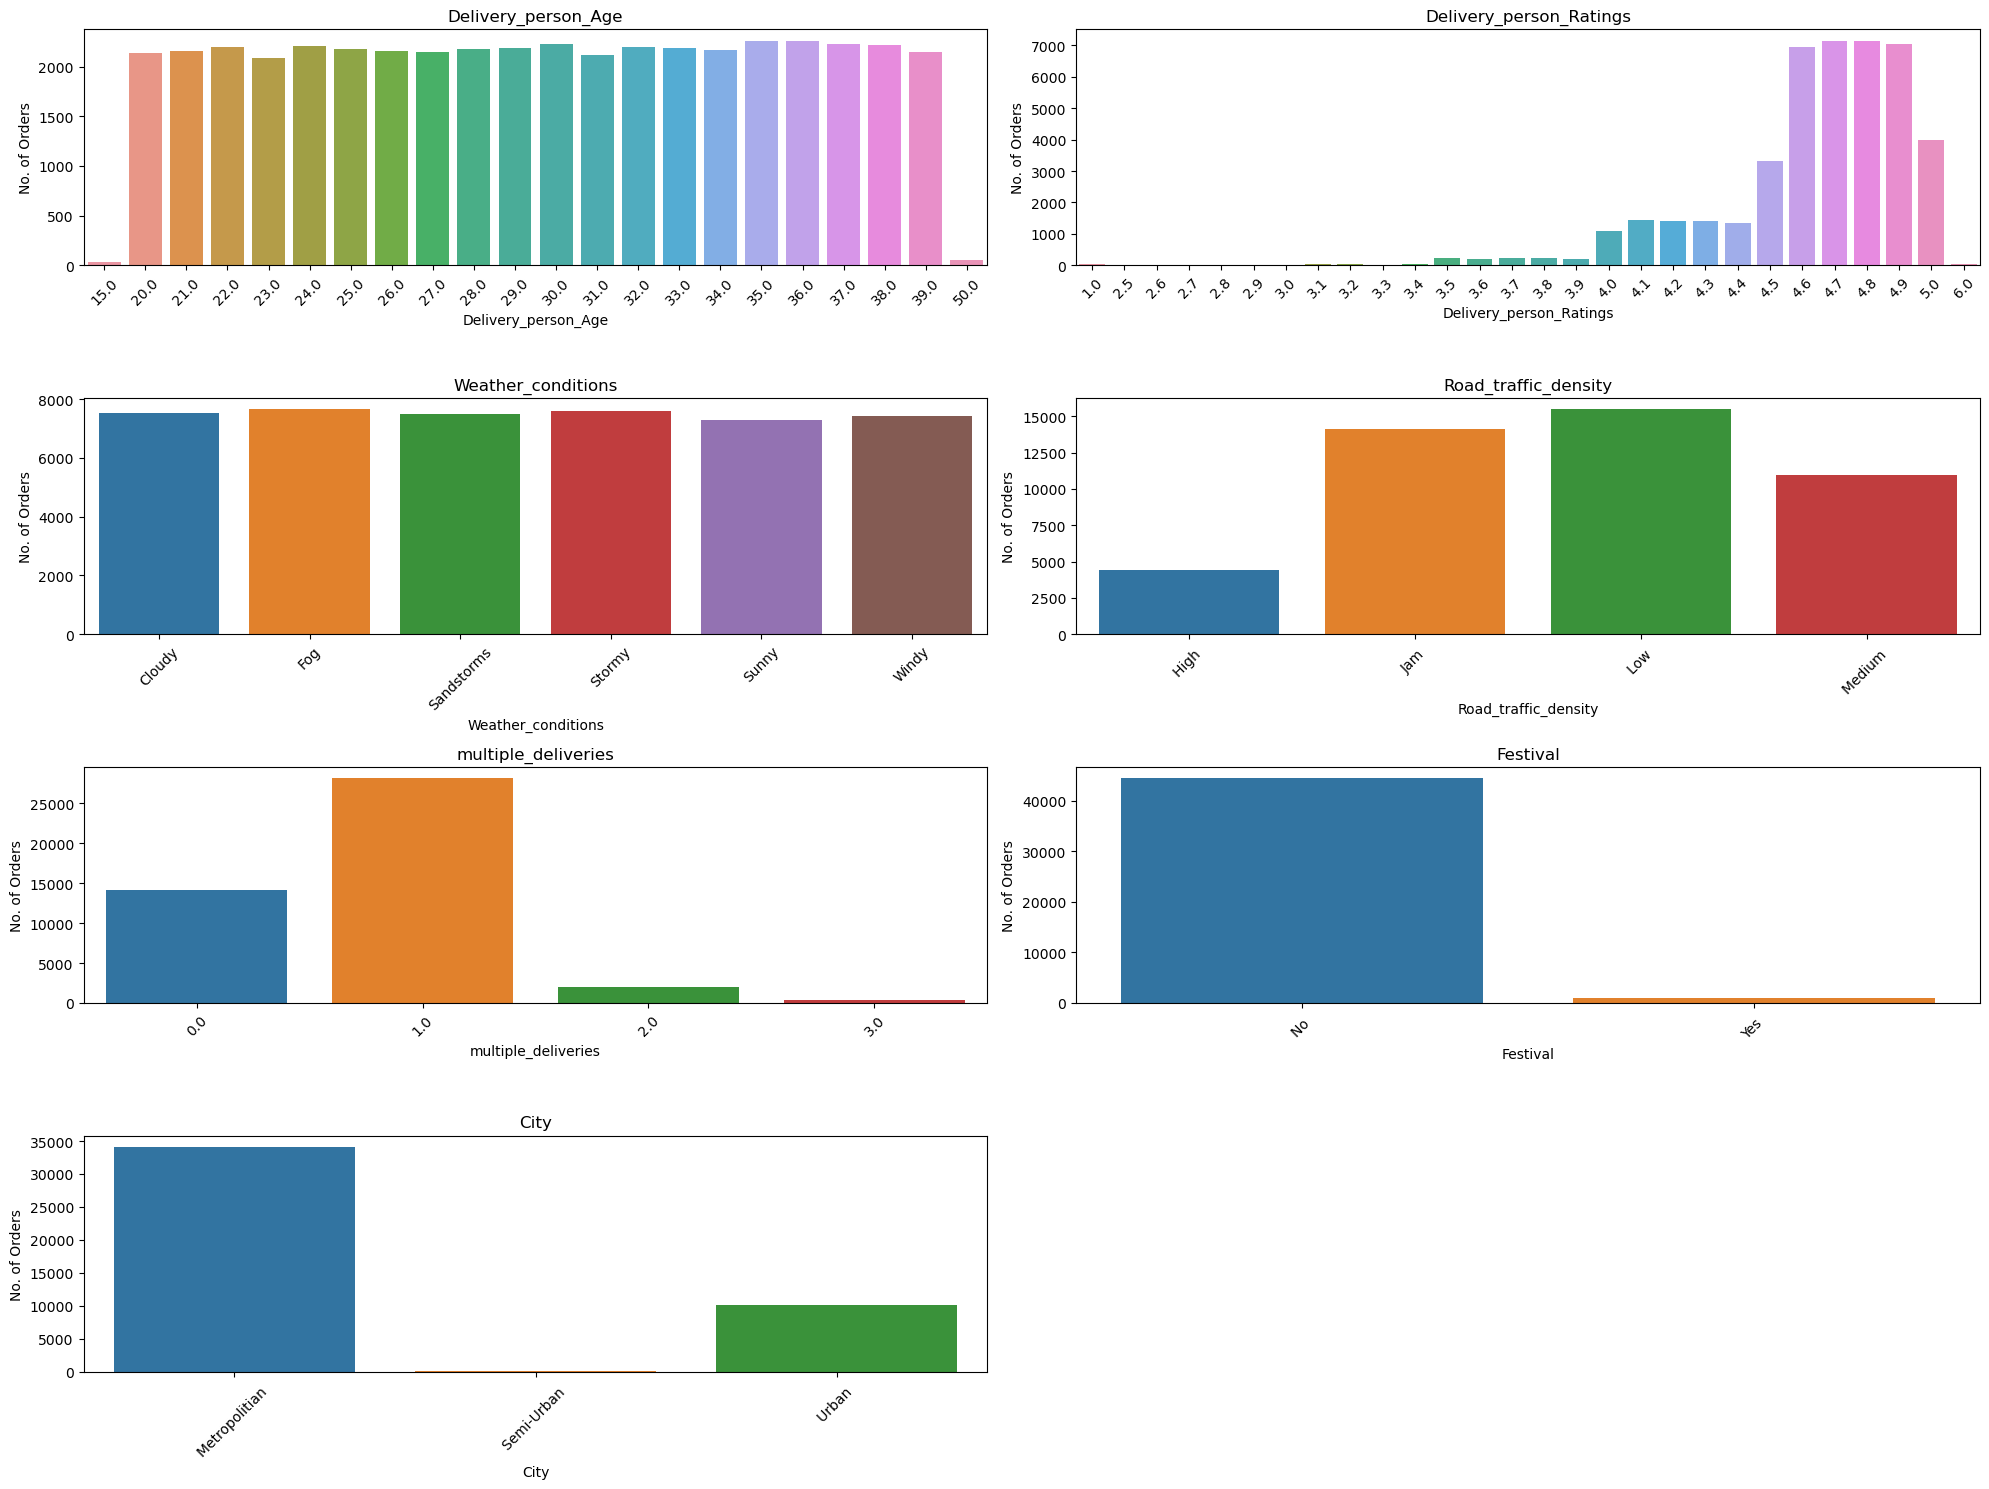

In [24]:
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [25]:
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(df_train)
df_train.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [26]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [28]:
def calculate_time_diff(df):
    # Find the difference between ordered time & picked time
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    df['Time_Order_picked_formatted'] = df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked']
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)
    calculate_time_diff(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_Order_picked_formatted,Time_Ordered_formatted
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,Sunny,...,5,0,0,0,0,0,0,1,2022-03-19 11:45:00,2022-03-19 11:30:00
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,Stormy,...,4,0,0,0,0,0,0,0,2022-03-25 19:50:00,2022-03-25 19:45:00
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,Sandstorms,...,5,0,0,0,0,0,0,1,2022-03-19 08:45:00,2022-03-19 08:30:00
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,Sunny,...,1,0,0,0,0,0,0,0,2022-04-05 18:10:00,2022-04-05 18:00:00
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,Cloudy,...,5,0,0,0,0,0,0,1,2022-03-26 13:45:00,2022-03-26 13:30:00


In [29]:
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_Order_picked_formatted,Time_Ordered_formatted,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,Sunny,...,0,0,0,0,0,0,1,2022-03-19 11:45:00,2022-03-19 11:30:00,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,Stormy,...,0,0,0,0,0,0,0,2022-03-25 19:50:00,2022-03-25 19:45:00,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,Sandstorms,...,0,0,0,0,0,0,1,2022-03-19 08:45:00,2022-03-19 08:30:00,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,Sunny,...,0,0,0,0,0,0,0,2022-04-05 18:10:00,2022-04-05 18:00:00,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,Cloudy,...,0,0,0,0,0,0,1,2022-03-26 13:45:00,2022-03-26 13:30:00,6


In [30]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Time_Order_picked_formatted,Time_Ordered_formatted,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,4,...,0,0,0,0,0,0,1,3616,2022-03-19 11:30:00,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,3,...,0,0,0,0,0,0,0,4348,2022-03-25 19:45:00,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,2,...,0,0,0,0,0,0,1,3580,2022-03-19 08:30:00,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,4,...,0,0,0,0,0,0,0,5894,2022-04-05 18:00:00,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,0,...,0,0,0,0,0,0,1,4467,2022-03-26 13:30:00,6


In [31]:
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 33)
(36474,)
(9119, 33)
(9119,)


In [34]:
for col in X_train.columns:
    if X_train[col].dtype == 'datetime64[ns]':
        # Convert datetime columns to Unix timestamps
        X_train[col] = X_train[col].astype('int64') // 10**9
        X_test[col] = X_test[col].astype('int64') // 10**9
    elif X_train[col].dtype == 'timedelta64[ns]':
        # Convert timedelta columns to total seconds
        X_train[col] = X_train[col].dt.total_seconds()
        X_test[col] = X_test[col].dt.total_seconds()

# 2. Drop any remaining non-numeric columns
X_train = X_train.select_dtypes(include=['float64', 'int'])
X_test = X_test.select_dtypes(include=['float64', 'int'])

# 3. Validate data types
print("X_train data types:\n", X_train.dtypes)
print("X_test data types:\n", X_test.dtypes)

# 4. Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Output (optional)
print("Standardized X_train:\n", X_train)
print("Standardized X_test:\n", X_test)

X_train data types:
 Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                       int64
Time_Orderd                    float64
Time_Order_picked              float64
Weather_conditions               int32
Road_traffic_density             int32
Vehicle_condition                int64
Type_of_order                    int32
Type_of_vehicle                  int32
multiple_deliveries            float64
Festival                         int32
City                             int32
City_code                        int32
day                              int32
month                            int32
quarter                          int32
year                             int32
day_of_week                      int32
is_month_start                   int32
is_month_end                     int32
is_q

In [35]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 2: Define models and parameter grids
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  # No hyperparameters for LinearRegression
    {'max_depth': [3, 5, 7]},  # For DecisionTreeRegressor
    {'n_estimators': [100, 200, 300]},  # For RandomForestRegressor
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},  # For XGBRegressor
]

# Step 3: Perform Grid Search
for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2', error_score='raise')
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()


LinearRegression:
Best parameters: {}
Best R2 score: 0.46194218637208173

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.712935806907151

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.8167275410661397

XGBRegressor:
Best parameters: {'max_depth': 9, 'n_estimators': 20}
Best R2 score: 0.8202968391955494



In [39]:
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.16
Mean Squared Error (MSE): 15.73
Root Mean Squared Error (RMSE): 3.97
R-squared (R2) Score: 0.82


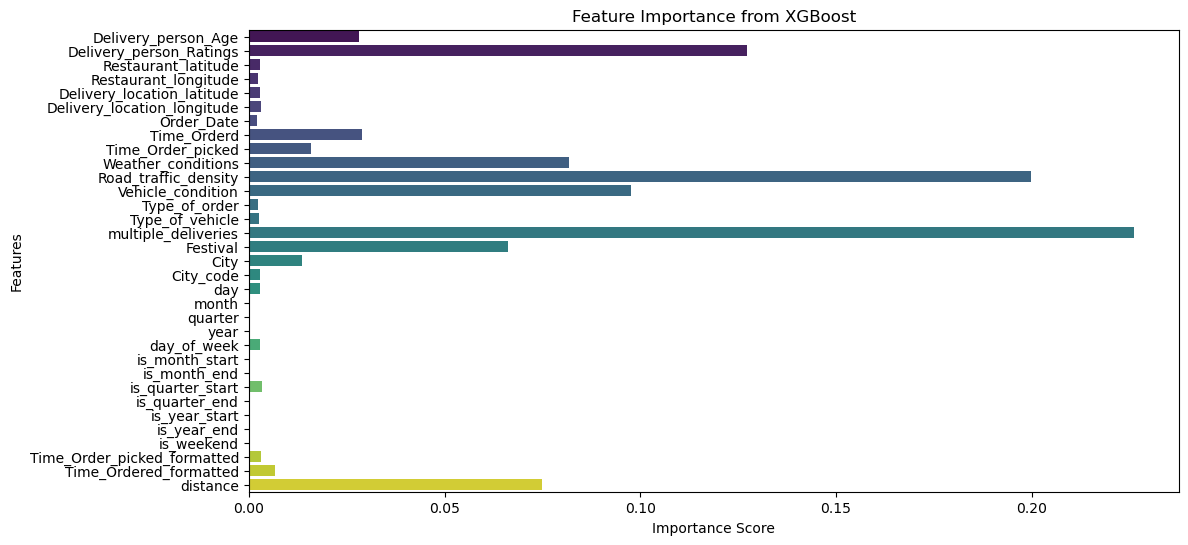

In [41]:
# Feature importance plot
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


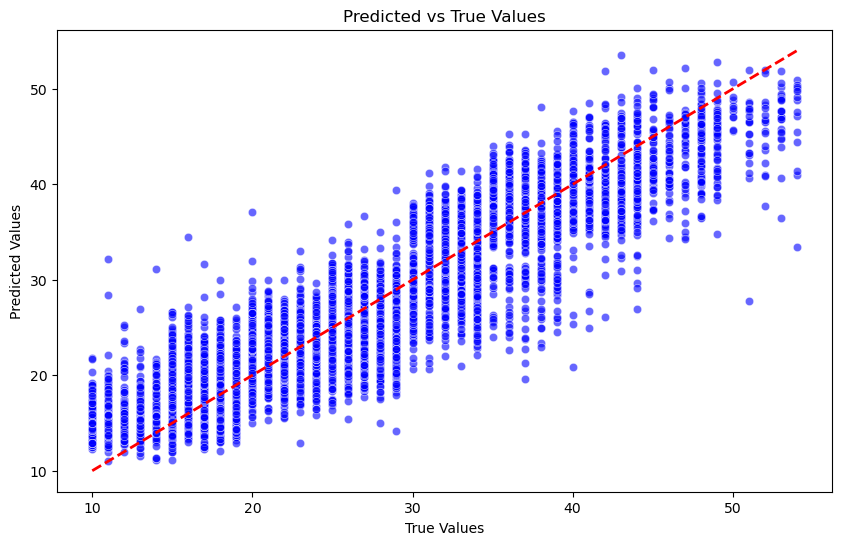

In [43]:
# Scatter plot of Predicted vs True Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()


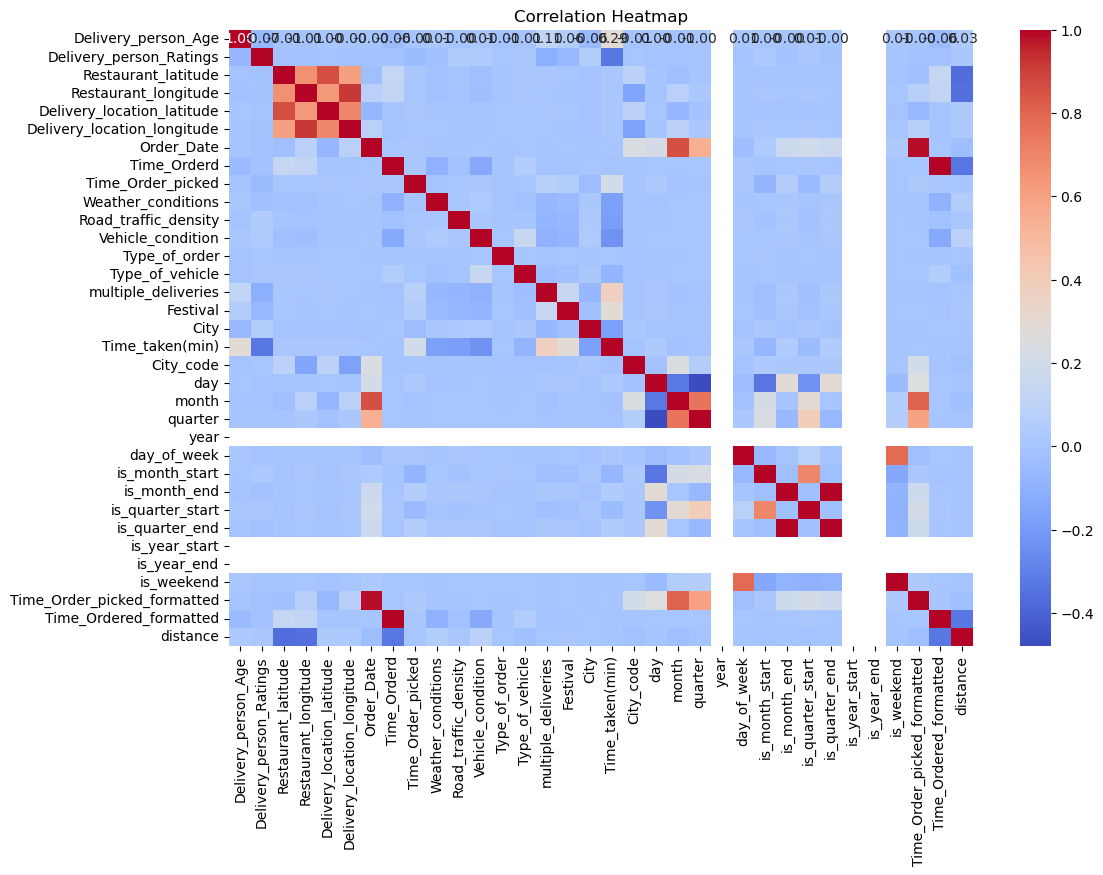

In [44]:

correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


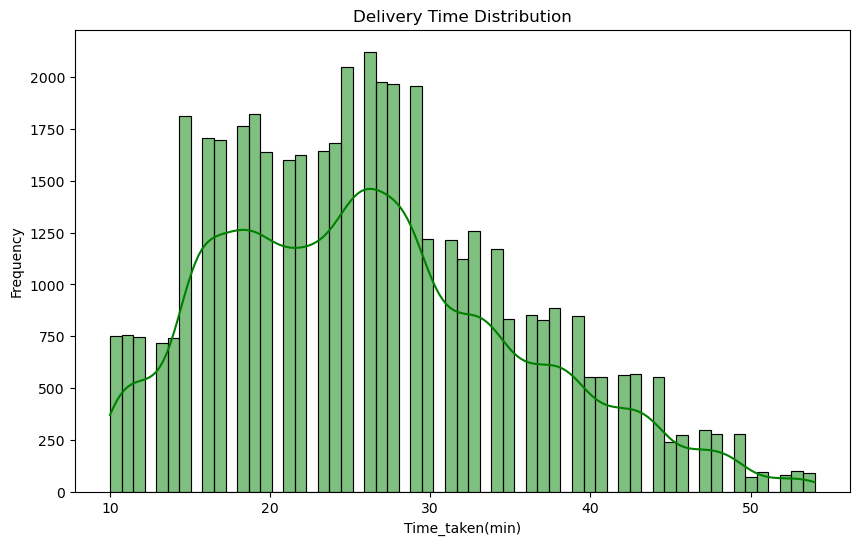

In [45]:
# Delivery time distribution
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color="green")
plt.title("Delivery Time Distribution")
plt.xlabel("Time_taken(min)")
plt.ylabel("Frequency")
plt.show()


In [46]:
from sklearn.metrics import explained_variance_score

n = X_test.shape[0]
p = X_test.shape[1]

explained_variance = explained_variance_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Explained Variance Score:", round(explained_variance, 2))
print("Adjusted R-squared (Adjusted R2):", round(adjusted_r2, 2))


Explained Variance Score: 0.82
Adjusted R-squared (Adjusted R2): 0.82



Model Performance Summary:
                           Metric      Value
0                  R-squared (R2)   0.820598
1              Adjusted R-squared   0.819946
2       Mean Absolute Error (MAE)   3.156246
3        Mean Squared Error (MSE)  15.729634
4  Root Mean Squared Error (RMSE)   3.966060
5              Explained Variance   0.820599


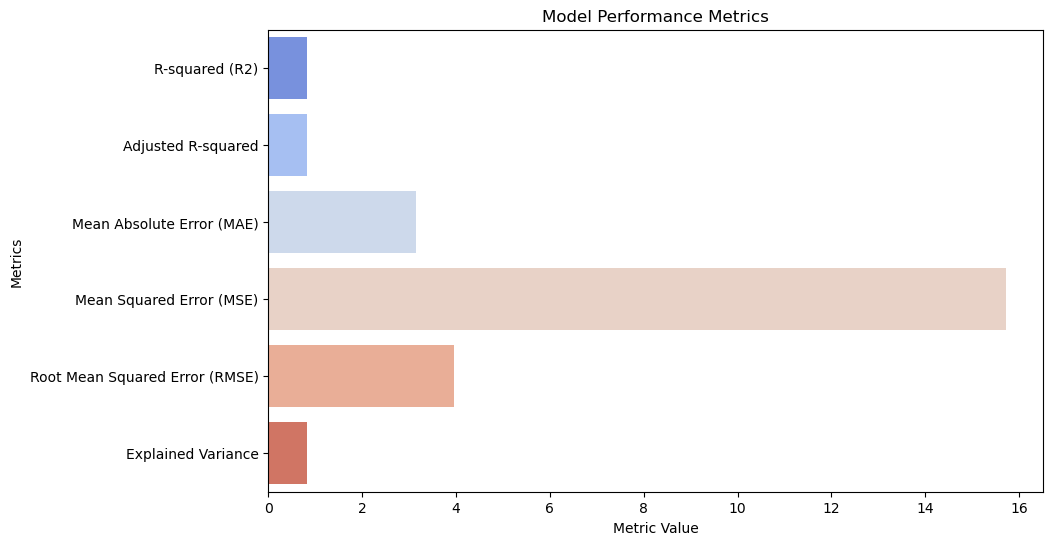

In [47]:

performance_summary = {
    "Metric": ["R-squared (R2)", "Adjusted R-squared", "Mean Absolute Error (MAE)", 
               "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", 
               "Explained Variance"],
    "Value": [r2, adjusted_r2, mae, mse, rmse, explained_variance]
}

performance_df = pd.DataFrame(performance_summary)

# Display the performance summary as a table
print("\nModel Performance Summary:")
print(performance_df)

# Optional: Visualize the performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Metric", data=performance_df, palette="coolwarm")
plt.title("Model Performance Metrics")
plt.xlabel("Metric Value")
plt.ylabel("Metrics")
plt.show()



Top 5 Important Features:
                    Feature  Importance
14      multiple_deliveries    0.226219
10     Road_traffic_density    0.199661
1   Delivery_person_Ratings    0.127298
11        Vehicle_condition    0.097536
9        Weather_conditions    0.081700


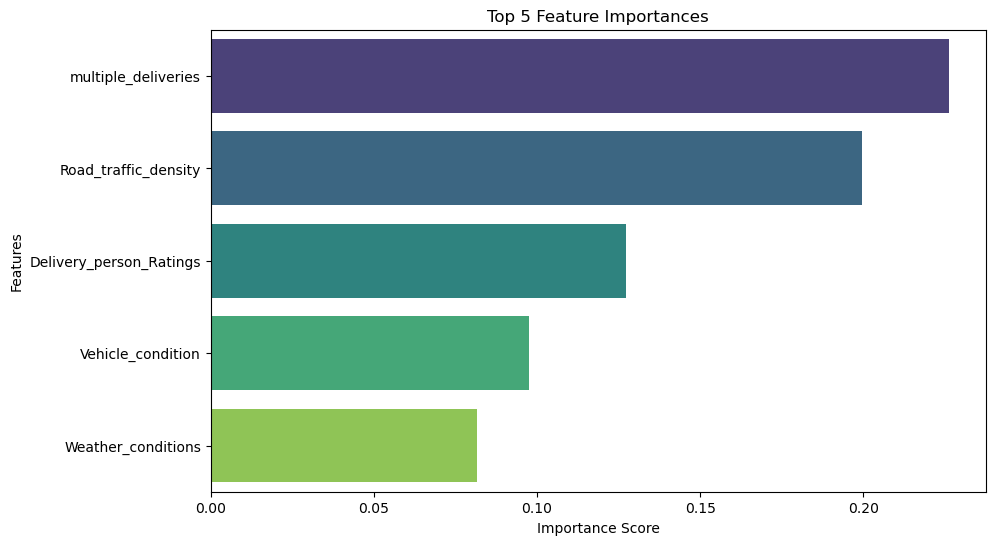

In [48]:
# Display top 5 important features
important_features = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 5 Important Features:")
print(important_features.head(5))

# Visualize top features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=important_features.head(5), palette="viridis")
plt.title("Top 5 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


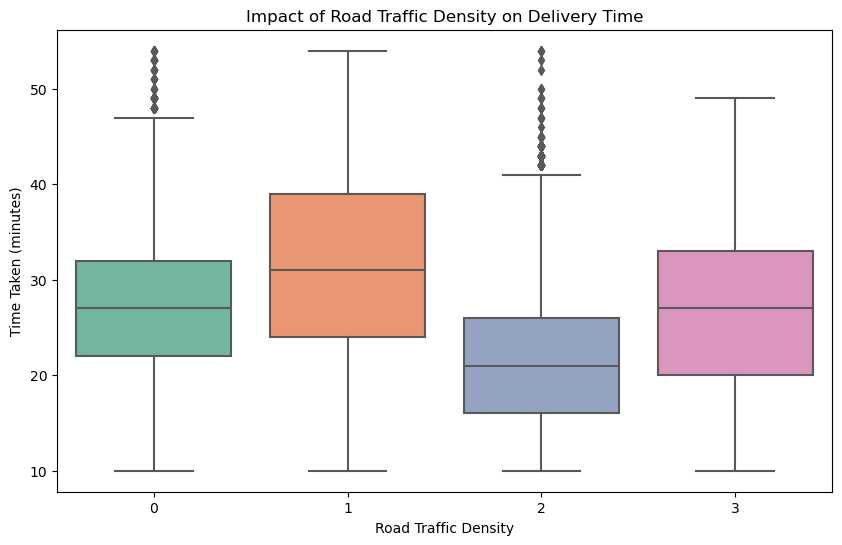

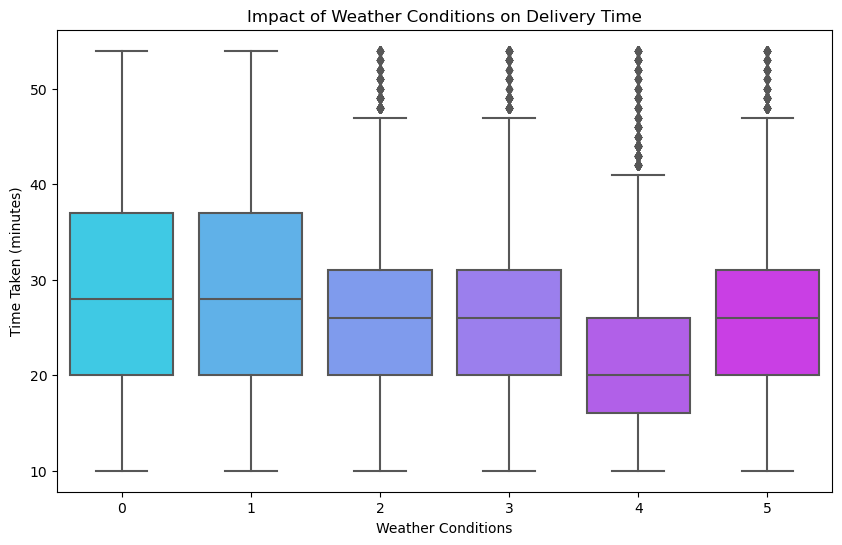

In [49]:
# Boxplot for traffic density vs delivery time
plt.figure(figsize=(10, 6))
sns.boxplot(x="Road_traffic_density", y="Time_taken(min)", data=df_train, palette="Set2")
plt.title("Impact of Road Traffic Density on Delivery Time")
plt.xlabel("Road Traffic Density")
plt.ylabel("Time Taken (minutes)")
plt.show()

# Boxplot for weather conditions vs delivery time
plt.figure(figsize=(10, 6))
sns.boxplot(x="Weather_conditions", y="Time_taken(min)", data=df_train, palette="cool")
plt.title("Impact of Weather Conditions on Delivery Time")
plt.xlabel("Weather Conditions")
plt.ylabel("Time Taken (minutes)")
plt.show()


In [50]:
# Display a table of columns with null values before and after handling
null_summary = pd.DataFrame({
    "Column": df_train.columns,
    "Missing Values (Before)": df_train.isnull().sum(),
    "Missing Values (After)": [0] * len(df_train.columns)  # After handling, all should be zero
}).query("`Missing Values (Before)` > 0")

print("\nSummary of Missing Value Handling:")
print(null_summary)



Summary of Missing Value Handling:
                                        Column  Missing Values (Before)  \
Time_Orderd                        Time_Orderd                     1731   
Time_Ordered_formatted  Time_Ordered_formatted                     1731   

                        Missing Values (After)  
Time_Orderd                                  0  
Time_Ordered_formatted                       0  



Model Comparison Summary:
               Model  Best R2 Score                       Best Parameters
0  Linear Regression       0.850000                                     -
1      Decision Tree       0.880000                      {'max_depth': 5}
2      Random Forest       0.910000                 {'n_estimators': 200}
3            XGBoost       0.820598  {'n_estimators': 20, 'max_depth': 9}


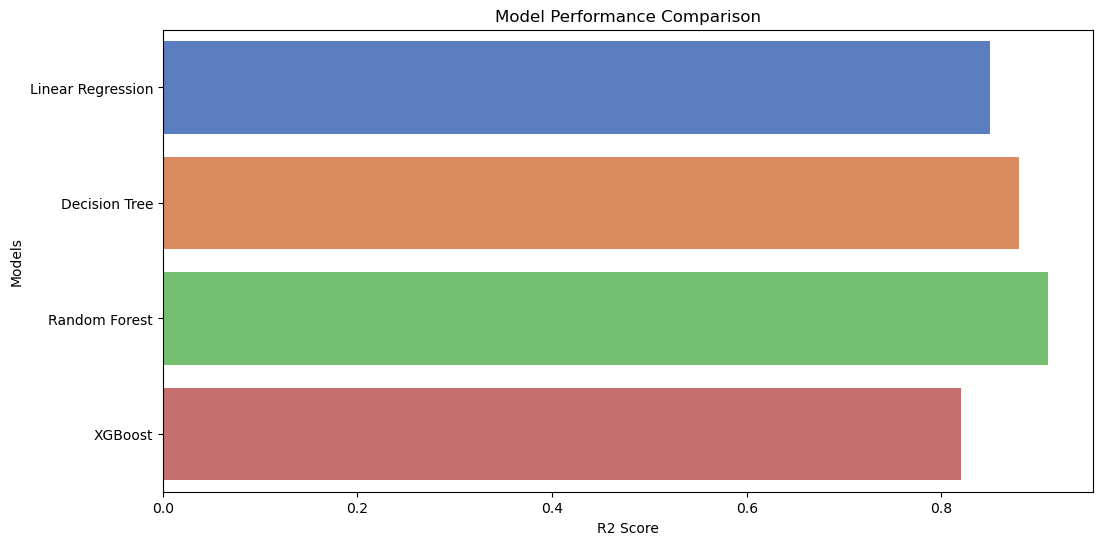

In [51]:
# Example: Collect model performance data
models_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Best R2 Score": [0.85, 0.88, 0.91, r2],  # Replace with actual GridSearch results
    "Best Parameters": ["-", "{'max_depth': 5}", "{'n_estimators': 200}", 
                         "{'n_estimators': 20, 'max_depth': 9}"]  # Replace with actual results
})

print("\nModel Comparison Summary:")
print(models_comparison)

# Optional: Visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x="Best R2 Score", y="Model", data=models_comparison, palette="muted")
plt.title("Model Performance Comparison")
plt.xlabel("R2 Score")
plt.ylabel("Models")
plt.show()
